# SMM with Gradient Descent

## Python Imports

In [1]:
import numpy as np
import random
import copy
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

%matplotlib inline

## Data Imports

## DEFINE THE PATH TO YOUR COURSE DIRECTORY

In [2]:
data_dir = "/home/mathias/bioinfo_algos/data/"

### Training Data

In [3]:
training_file = data_dir + "SMM/A0201_training"
#training_file = data_dir + "SMM/A2403_training"

training = np.loadtxt(training_file, dtype=str)

### Evaluation Data

In [4]:
evaluation_file = data_dir + "SMM/A0201_evaluation"
#evaluation_file = data_dir + "SMM/A2403_evaluation"
evaluation = np.loadtxt(evaluation_file, dtype=str)

### Alphabet

In [5]:
alphabet_file = data_dir + "Matrices/alphabet"
alphabet = np.loadtxt(alphabet_file, dtype=str)

### Sparse Encoding Scheme

In [6]:
sparse_file = data_dir + "Matrices/sparse"
_sparse = np.loadtxt(sparse_file, dtype=float)
sparse = {}

for i, letter_1 in enumerate(alphabet):
    
    sparse[letter_1] = {}

    for j, letter_2 in enumerate(alphabet):
        
        sparse[letter_1][letter_2] = _sparse[i, j]

## Peptide Encoding

In [7]:
def encode(peptides, encoding_scheme, alphabet):
    
    encoded_peptides = []

    for peptide in peptides:

        encoded_peptide = []

        for peptide_letter in peptide:

            for alphabet_letter in alphabet:

                encoded_peptide.append(encoding_scheme[peptide_letter][alphabet_letter])

        encoded_peptides.append(encoded_peptide)
        
    return np.array(encoded_peptides)

## Error Function

In [8]:
def cumulative_error(peptides, y, lamb, weights):

    error = 0
    
    for i in range(0, len(peptides)):
        
        # get peptide
        peptide = peptides[i]

        # get target prediction value
        y_target = y[i]
        
        # get prediction
        y_pred = np.dot(peptide, weights)
            
        # calculate error
        error += 1.0/2 * (y_pred - y_target)**2
        
    gerror = error + lamb*np.dot(weights, weights)
    error /= len(peptides)
        
    return gerror, error

## Predict value for a peptide list

In [9]:
def predict(peptides, weights):

    pred = []
    
    for i in range(0, len(peptides)):
        
        # get peptide
        peptide = peptides[i]
        
        # get prediction
        y_pred = np.dot(peptide, weights)
        
        pred.append(y_pred)
        
    return pred

## Calculate MSE between two vectors

In [10]:
def cal_mse(vec1, vec2):
    
    mse = 0
    
    for i in range(0, len(vec1)):
        mse += (vec1[i] - vec2[i])**2
        
    mse /= len(vec1)
    
    return( mse)

## Gradient Descent

In [11]:
def gradient_descent(y_pred, y_target, peptide, weights, lamb_N, epsilon):
    
    # do is dE/dO
    do = y_pred - y_target
        
    for i in range(0, len(weights)):
        
        de_dw_i = do*peptide+(2*lamb_N)*weights

        weights[i] -= epsilon*de_dw_i[i]

## Main Loop



In [21]:
# Random seed 
np.random.seed( 1 )

# peptides
peptides = training[:, 0]
peptides = encode(peptides, sparse, alphabet)
N = len(peptides)

# target values
y = np.array(training[:, 1], dtype=float)

#evaluation peptides
evaluation_peptides = evaluation[:, 0]
evaluation_peptides = encode(evaluation_peptides, sparse, alphabet)

#evaluation targets
evaluation_targets = np.array(evaluation[:, 1], dtype=float)

# weights
input_dim  = len(peptides[0])
output_dim = 1
w_bound = 0.1
weights = np.random.uniform(-w_bound, w_bound, size=input_dim)

# training epochs
epochs = 100

# regularization lambda
#lamb = 1
#lamb = 10
lamb = 0.01

# regularization lambda per target value
lamb_N = lamb/N

# learning rate
epsilon = 0.001

# error  plot
gerror_plot = []
mse_plot = []
train_mse_plot = []
eval_mse_plot = []
train_pcc_plot = []
eval_pcc_plot = []

# for each training epoch
for e in range(0, epochs):

    # for each peptide
    for i in range(0, N):

        # random index
        ix = np.random.randint(0, N)
        
        # get peptide       
        peptide = peptides[ix]

        # get target prediction value
        y_target = y[ix]
       
        # get initial prediction
        y_pred = np.dot(peptide, weights)

        # gradient descent 
        gradient_descent(y_pred, y_target, peptide, weights, lamb_N, epsilon)

    # compute error
    gerr, mse = cumulative_error(peptides, y, lamb, weights) 
    gerror_plot.append(gerr)
    mse_plot.append(mse)
    
    # predict on training data
    train_pred = predict( peptides, weights )
    train_mse = cal_mse( y, train_pred )
    train_mse_plot.append(train_mse)
    train_pcc = pearsonr( y, train_pred )
    train_pcc_plot.append( train_pcc[0] )
        
    # predict on evaluation data
    eval_pred = predict(evaluation_peptides, weights )
    eval_mse = cal_mse(evaluation_targets, eval_pred )
    eval_mse_plot.append(eval_mse)
    eval_pcc = pearsonr(evaluation_targets, eval_pred)
    eval_pcc_plot.append( eval_pcc[0] )
    
    print ("Epoch: ", e, "Gerr:", gerr, train_pcc[0], train_mse, eval_pcc[0], eval_mse)

Epoch:  0 Gerr: 99.58834181262476 0.4198916022038107 0.08056749078997505 0.4231182614489795 0.08088862512589416
Epoch:  1 Gerr: 77.03149115315188 0.5847456042431185 0.06231759564399694 0.5816420141896501 0.062492446499643105
Epoch:  2 Gerr: 65.64213617599142 0.6596640743629382 0.05310318627140036 0.6508681146851769 0.053948934731501856
Epoch:  3 Gerr: 58.35731039049696 0.7061371544754662 0.047209354520808766 0.691305215405135 0.04887159924542738
Epoch:  4 Gerr: 53.05726855167328 0.7382588016873021 0.04292135369557974 0.719941157341421 0.04508104771676492
Epoch:  5 Gerr: 49.33595259984957 0.7598859421207529 0.03991042945695128 0.7372643584005804 0.042719083476679826
Epoch:  6 Gerr: 46.6993104533259 0.7744874522429651 0.037777181529675706 0.7503230908975059 0.040886482246438136
Epoch:  7 Gerr: 44.76947916602588 0.784892253887258 0.0362157624501147 0.7587072440760998 0.0397049745940497
Epoch:  8 Gerr: 43.23445629008033 0.7929886034512413 0.034973772073837374 0.7648208944269206 0.038855526

Epoch:  73 Gerr: 36.00934893704498 0.8304831967116924 0.02912677985912112 0.789594386524682 0.0355743911524048
Epoch:  74 Gerr: 36.017363967172244 0.8303688630466212 0.029133218283880057 0.7907102143662957 0.03545433088194261
Epoch:  75 Gerr: 36.05555746436785 0.8301824638514066 0.029164111382246373 0.7904276698656622 0.03550123709641083
Epoch:  76 Gerr: 35.992187651799775 0.8305605017507037 0.029112844756093378 0.7893983705211014 0.03563244646537075
Epoch:  77 Gerr: 36.019624403630345 0.8305437802499409 0.0291350572325343 0.7892752136664751 0.03567970154401964
Epoch:  78 Gerr: 35.98650973563441 0.8305442196963423 0.029108229418832562 0.7911807355269166 0.035382783175883184
Epoch:  79 Gerr: 36.002097268784055 0.8304625194658551 0.029120779064586846 0.7904674585389708 0.03551848324494529
Epoch:  80 Gerr: 36.03816279139159 0.8303054053136469 0.02914992425277023 0.7902344207931908 0.03559170848727043
Epoch:  81 Gerr: 35.983394749622505 0.8305512996167562 0.0291055998211347 0.7900737660511

## Error Plot

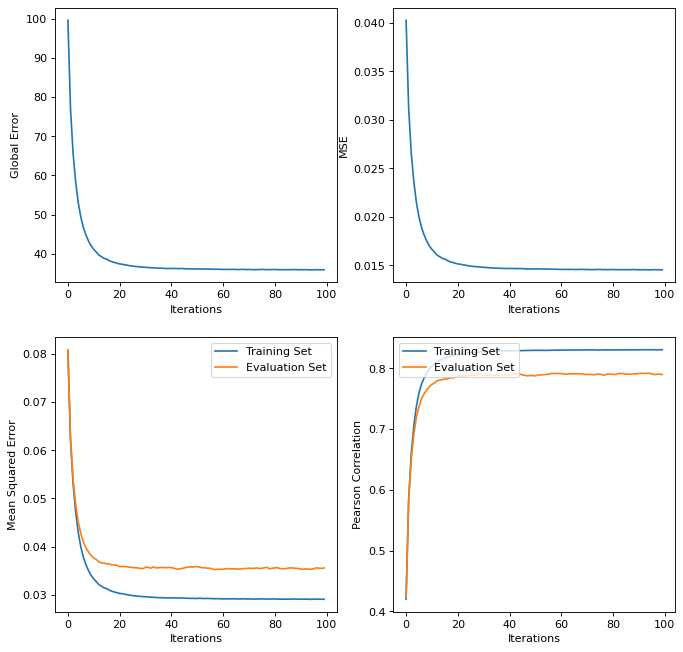

In [22]:
fig = plt.figure(figsize=(10, 10), dpi= 80)

x = np.arange(0, len(gerror_plot))

plt.subplot(2, 2, 1)
plt.plot(x, gerror_plot)
plt.ylabel("Global Error", fontsize=10);
plt.xlabel("Iterations", fontsize=10);

plt.subplot(2, 2, 2)
plt.plot(x, mse_plot)
plt.ylabel("MSE", fontsize=10);
plt.xlabel("Iterations", fontsize=10);


x = np.arange(0, len(train_mse_plot))

plt.subplot(2, 2, 3)
plt.plot(x, train_mse_plot, label="Training Set")
plt.plot(x, eval_mse_plot, label="Evaluation Set")
plt.ylabel("Mean Squared Error", fontsize=10);
plt.xlabel("Iterations", fontsize=10);
plt.legend(loc='upper right');


plt.subplot(2, 2, 4)
plt.plot(x, train_pcc_plot, label="Training Set")
plt.plot(x, eval_pcc_plot, label="Evaluation Set")
plt.ylabel("Pearson Correlation", fontsize=10);
plt.xlabel("Iterations", fontsize=10);
plt.legend(loc='upper left');

## Get PSSM Matrix

### Vector to Matrix

In [23]:
# our matrices are vectors of dictionaries
def vector_to_matrix(vector, alphabet):
    
    rows = int(len(vector)/len(alphabet))
    
    matrix = [0] * rows
    
    offset = 0
    
    for i in range(0, rows):
        
        matrix[i] = {}
        
        for j in range(0, 20):
            
            matrix[i][alphabet[j]] = vector[j+offset] 
        
        offset += len(alphabet)

    return matrix

### Matrix to Psi-Blast

In [24]:
def to_psi_blast(matrix):

    # print to user
    
    header = ["", "A", "R", "N", "D", "C", "Q", "E", "G", "H", "I", "L", "K", "M", "F", "P", "S", "T", "W", "Y", "V"]

    print('{:>4} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8}'.format(*header)) 

    letter_order = ["A", "R", "N", "D", "C", "Q", "E", "G", "H", "I", "L", "K", "M", "F", "P", "S", "T", "W", "Y", "V"]

    for i, row in enumerate(matrix):

        scores = []

        scores.append(str(i+1) + " A")

        for letter in letter_order:

            score = row[letter]

            scores.append(round(score, 4))

        print('{:>4} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8}'.format(*scores)) 

### Print

In [25]:
matrix = vector_to_matrix(weights, alphabet)
to_psi_blast(matrix)

            A        R        N        D        C        Q        E        G        H        I        L        K        M        F        P        S        T        W        Y        V
 1 A   0.0084   0.0064  -0.0351  -0.1978  -0.0326  -0.0202  -0.1381   -0.027   -0.053   0.0082   0.0172   0.0361   0.0845    0.166  -0.1695  -0.0122  -0.0502   0.0093   0.1526   0.0152
 2 A   0.0146  -0.0134  -0.1498  -0.0117  -0.0608    0.085  -0.0402  -0.0612  -0.0906   0.1285   0.2687  -0.0182   0.2798  -0.0025  -0.0655   0.0418   0.0385   0.0733   0.0232   0.0633
 3 A   0.0366  -0.0947  -0.0046   0.0204  -0.0534  -0.0126  -0.0919   -0.051  -0.0385   0.0628   0.0607  -0.1191   0.1688   0.0761  -0.0282   0.0307  -0.0425    0.063   0.0869  -0.0293
 4 A   0.0302  -0.0489   0.0013   0.0686   0.0393   0.0037   0.0594   0.0299   0.0042  -0.0093  -0.0415   0.0171   0.0392   0.0248   0.0147   0.0273   0.0201    0.044   0.0238  -0.0052
 5 A  -0.0003   0.0024  -0.0192   0.0342    0.035  -0.0127   0.0231   0.004

## Performance Evaluation

In [26]:
evaluation_peptides = evaluation[:, 0]
evaluation_peptides = np.array(encode(evaluation_peptides, sparse, alphabet))

evaluation_targets = np.array(evaluation[:, 1], dtype=float)

y_pred = []
for i in range(0, len(evaluation_peptides)):
    y_pred.append(np.dot(evaluation_peptides[i].T, weights))

y_pred = np.array(y_pred)

PCC:  0.7900923208273936


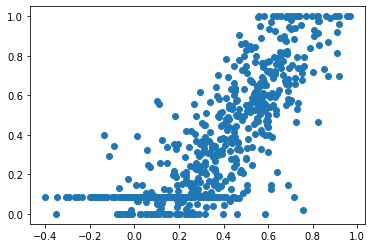

In [27]:
pcc = pearsonr(evaluation_targets, np.array(y_pred))
print("PCC: ", pcc[0])

plt.scatter(y_pred, evaluation_targets);